In [179]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig, figure
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

In [182]:
# read data
divorce_data=pd.read_csv('divorce/divorce.csv',delimiter=";")
data=divorce_data.copy()
married_data=data[data['Class']==0].drop(columns=['Class'])
divorced_data=data[data['Class']==1].drop(columns=['Class'])
# get rank of matrix
X=data.drop(columns=['Class'])
y=data['Class']
print("Rank=",np.linalg.matrix_rank(data))

Rank= 55


In [48]:
# PCA
U,S,VT=np.linalg.svd(data)
# columns of U represent prinicaipal components of data

PCA components can be used in prediction problems. Note that PCA don't have any real world meaning and hence can't be use for explanation

### Explore data

In [70]:
# check for nans
data.isnull().values.any()

False

In [66]:
# ensure data doesn't have outliers on max value
print("Max value of an attribute in data=",max(data.max()))
# ensure data doesn't have outlier on min value
print("Max value of an attribute in data=",min(data.min()))

Max value of an attribute in data= 4
Max value of an attribute in data= 0


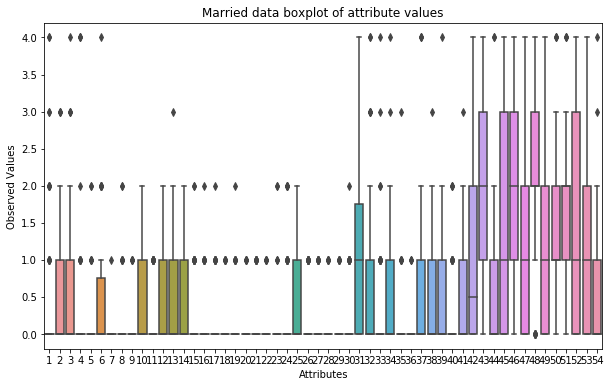

In [282]:
fig = figure(figsize=(10, 6))  # Create the figure space
sns.boxplot(data=married_data).set(title='Married data boxplot of attribute values', ylabel='Observed Values', xlabel='Attributes',
                                 xticklabels=[i for i in range(1,55)])
fig.savefig('married-attributes', bbox_inches='tight')

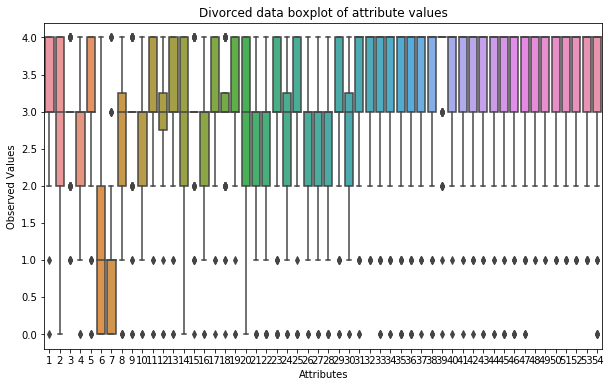

In [283]:
fig = figure(figsize=(10, 6))  # Create the figure space
sns.boxplot(data=divorced_data).set(title='Divorced data boxplot of attribute values', ylabel='Observed Values', xlabel='Attributes',
                                 xticklabels=[i for i in range(1,55)])
fig.savefig('divorced-attributes', bbox_inches='tight')

### Correlation
Darker values towards red denote high correlation.

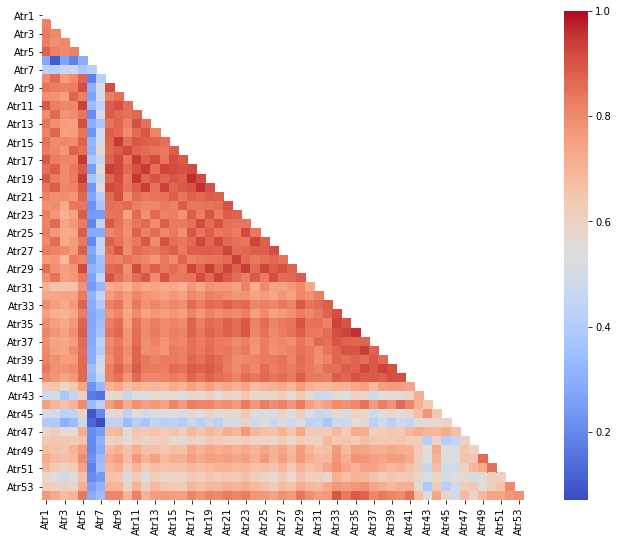

In [185]:
corr=X.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
matrix = np.triu(corr)
sns.heatmap(corr,  cmap= 'coolwarm',mask=matrix)
f.savefig('correlation.png', bbox_inches='tight')

We can see that there is high correlation between features. Only few attributes like 6,7,43,45, and 46 seem to be not corelated highly with other attributes.
### Chi-square scores
High scores are preferred as it means label is more dependent on the corresponding feature

Text(0.5, 1.0, 'Chi-square scores')

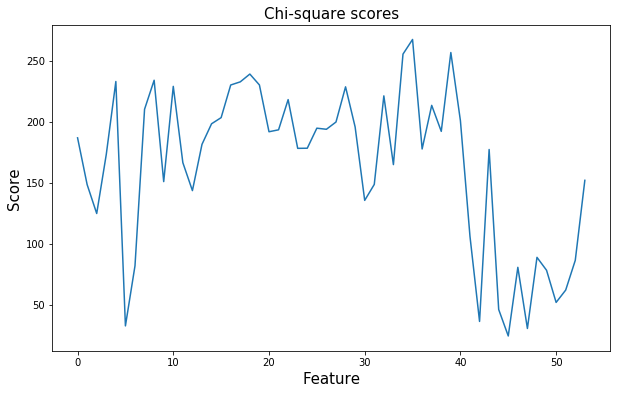

In [209]:
scores = SelectKBest(chi2, k=54).fit(X,y).scores_
fig = figure(figsize=(10, 6))  # Create the figure space
plt.plot(scores)
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.title("Chi-square scores", fontsize=15)


In [371]:
# KNN
#Import packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_selected=X[['Atr9','Atr11','Atr15','Atr17','Atr18','Atr19','Atr20','Atr40']]
XTrain, XTest, yTrain, yTest = train_test_split(X_selected, y,)
#Define a KNN model
knn = KNeighborsRegressor(n_neighbors=10, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski")

#Fit the model to the training data
knn.fit(XTrain, yTrain)

#Predict on the test set
preds = knn.predict(XTest)
# print("\nThe single test set R^2 is: {:.4f}".format(knn.score(XTest, yTest))) #Note that for KNN score returns R2

print("\nUsing 10-fold cross validation, the test sets ROC AUC values are:\n",cross_val_score(knn, XTrain, yTrain, cv=10, scoring='roc_auc'))
# accuracy_score(yTest, preds)



Using 10-fold cross validation, the test sets ROC AUC values are:
 [0.9        1.         1.         1.         1.         1.
 0.91666667 1.         1.         1.        ]


In [374]:
from sklearn.model_selection import GridSearchCV

#Choose some parameters to search over
params = {'n_neighbors':[1,2,5,10,20],'weights':['uniform','distance'],'p':[1,2]}

#Define and fit model
KNN = KNeighborsRegressor()
model = GridSearchCV(KNN, params, cv=10, scoring='roc_auc', return_train_score=True)
model.fit(XTrain,yTrain)
#Print out some results
print("The best model is:",model.best_params_)
print("\nThe ROC score of the best model is:", model.best_score_)

The best model is: {'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}

The ROC score of the best model is: 0.9885451818522685


/Users/soni6/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


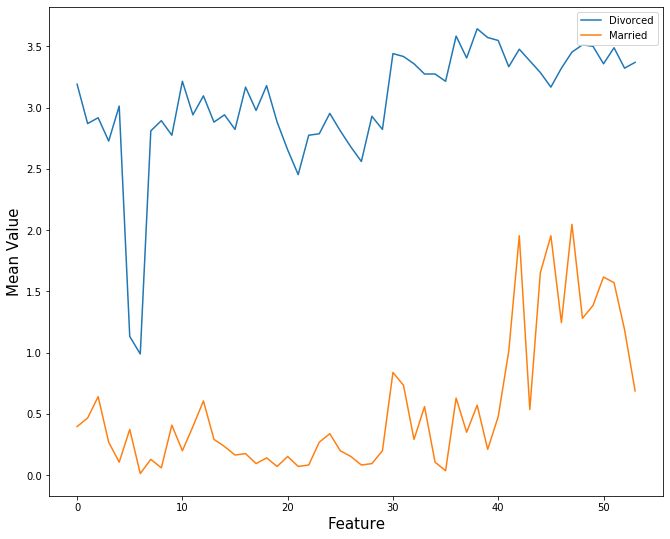

In [367]:
fig = figure(figsize=(11, 9))  # Create the figure space
plt.plot(divorced_data.mean().reset_index(drop=True),label="Divorced")
plt.plot(married_data.mean().reset_index(drop=True),label="Married")
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Mean Value", fontsize=15)
plt.legend()
fig.savefig('mean-values.png', bbox_inches='tight')

In [358]:
#Correlation with output variable
cor = data.corr()
cor_target = abs(cor["Class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.9]
print(relevant_features,relevant_features.size)
relevant_features.argsort()

Atr9     0.912368
Atr11    0.918386
Atr15    0.901220
Atr17    0.929346
Atr18    0.923208
Atr19    0.928627
Atr20    0.907008
Atr40    0.938684
Class    1.000000
Name: Class, dtype: float64 9


Atr9     2
Atr11    6
Atr15    0
Atr17    1
Atr18    4
Atr19    5
Atr20    3
Atr40    7
Class    8
Name: Class, dtype: int64

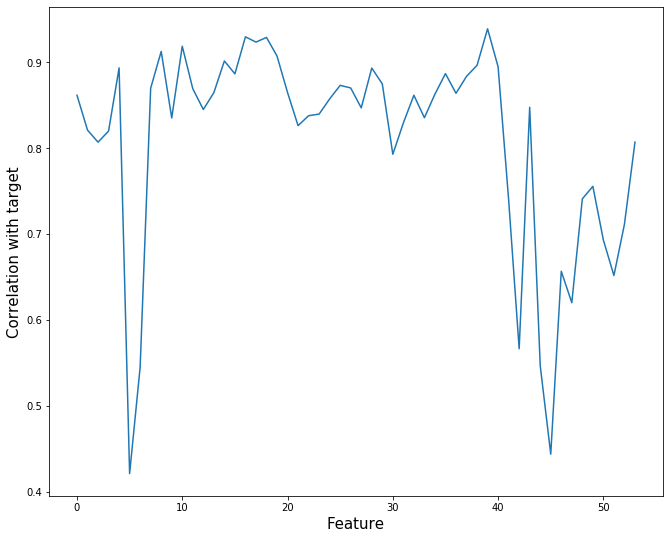

In [347]:
fig = figure(figsize=(11, 9))  # Create the figure space
plt.plot(cor_target.reset_index(drop=True).iloc[:-1])
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Correlation with target", fontsize=15)
fig.savefig('correlation-target.png', bbox_inches='tight')

In [156]:
import numpy as np
import pandas as pd
a=np.array([[1,2,3],[7,5,6],[7,8,9]])
b=np.array([[-1,-5,1],[-0.4,-0.1,1],[-1,0.9,1]])
a=np.array([[0,1],[0,-1]])
b=np.array([[0,1],[0,1]])
from scipy.linalg import hadamard,subspace_angles

In [155]:
# H = hadamard(4)
np.rad2deg(subspace_angles(a, b))

array([0.])

Text(0, 0.5, 'Principal angles between subspaces (degrees)')

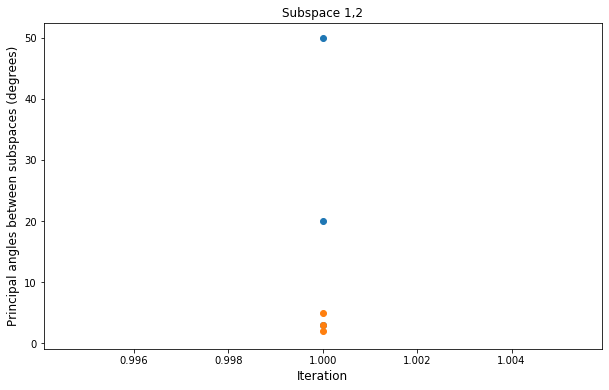

In [102]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
f=figure(figsize=(10,6))
it=1
plt.scatter([it for i in range(len(c))],c)
s1,s2=1,2
c=np.array([5,2,3])
plt.scatter([it for i in range(len(c))],c)
plt.title("Subspace {},{}".format(s1,s2))
plt.xlabel("Iteration",fontsize=12)
plt.ylabel("Principal angles between subspaces (degrees)",fontsize=12)


In [138]:
import pandas as pd
num_subspaces=3
ss =['S{}'.format(i) for i in range(num_subspaces)]
it=2
angles = pd.DataFrame(columns=ss,index=[i for i in range(it)])

In [142]:
angles.iloc[0]=np.random.rand(1,3)
angles.iloc[1]=np.random.rand(1,3)